In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import transforms


Class Generator

In [8]:
class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

Class Discriminator

In [4]:
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [9]:
# Define the transformation to apply to the input data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the MNIST dataset
dataset = MNIST(root='./data', train=True, transform=transform, download=True)

# Create a data loader to handle batching and shuffling
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define the input and output dimensions
input_dim = 100  # Size of the random noise vector
output_dim = 28 * 28  # Size of the output image (MNIST: 28x28)

# Create the generator and discriminator
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# Define the optimizers
lr = 0.0002  # Learning rate
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Binary cross-entropy loss
criterion = nn.BCELoss()

num_epochs = 50  # Number of training epochs

In [11]:
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.shape[0]

        # Generate random noise
        z = torch.randn(batch_size, input_dim)

        # Generate fake images
        fake_images = generator(z)

        # Train the discriminator
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Compute discriminator loss on real and fake data
        real_loss = criterion(discriminator(real_images.view(batch_size, -1)), real_labels)
        fake_loss = criterion(discriminator(fake_images.detach().view(batch_size, -1)), fake_labels)
        d_loss = real_loss + fake_loss

        # Backpropagation and optimizer step for discriminator
        discriminator.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train the generator
        z = torch.randn(batch_size, input_dim)
        fake_images = generator(z)

        # Compute generator loss
        g_loss = criterion(discriminator(fake_images.view(batch_size, -1)), real_labels)

        # Backpropagation and optimizer step for generator
        generator.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # Print training statistics
        if i % 100 == 0:
            print(
                f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Step [{i}/{len(dataloader)}], "
                f"D_loss: {d_loss.item():.4f}, "
                f"G_loss: {g_loss.item():.4f}"
            )

# Run the training loop
generator.train()
discriminator.train()

Epoch [1/50], Step [0/938], D_loss: 1.3873, G_loss: 0.7695
Epoch [1/50], Step [100/938], D_loss: 1.4381, G_loss: 0.7305
Epoch [1/50], Step [200/938], D_loss: 1.5097, G_loss: 0.6915
Epoch [1/50], Step [300/938], D_loss: 1.4239, G_loss: 0.7218
Epoch [1/50], Step [400/938], D_loss: 1.1014, G_loss: 1.0129
Epoch [1/50], Step [500/938], D_loss: 0.9118, G_loss: 1.0838
Epoch [1/50], Step [600/938], D_loss: 0.9820, G_loss: 1.0291
Epoch [1/50], Step [700/938], D_loss: 1.6277, G_loss: 0.5632
Epoch [1/50], Step [800/938], D_loss: 0.9508, G_loss: 1.1129
Epoch [1/50], Step [900/938], D_loss: 1.5740, G_loss: 0.6885
Epoch [2/50], Step [0/938], D_loss: 1.8186, G_loss: 0.6044
Epoch [2/50], Step [100/938], D_loss: 0.7658, G_loss: 1.3578
Epoch [2/50], Step [200/938], D_loss: 1.0293, G_loss: 1.1132
Epoch [2/50], Step [300/938], D_loss: 1.4966, G_loss: 0.7716
Epoch [2/50], Step [400/938], D_loss: 1.0460, G_loss: 1.0449
Epoch [2/50], Step [500/938], D_loss: 1.7759, G_loss: 0.5907
Epoch [2/50], Step [600/938]

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

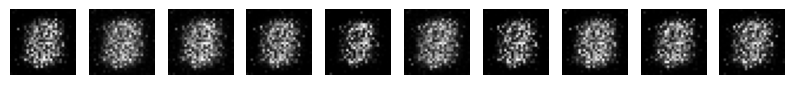

In [12]:
# Generate random noise
z = torch.randn(10, input_dim)  # 10 is the number of images you want to generate

# Generate fake images
fake_images = generator(z)

# Reshape and denormalize the generated images
fake_images = fake_images.view(-1, 1, 28, 28)  # Reshape the images if needed
fake_images = fake_images * 0.5 + 0.5  # Denormalize the images if needed

# Convert tensors to numpy arrays
fake_images = fake_images.detach().numpy()

# Visualize the generated images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(10, 1))

for i, ax in enumerate(axes):
    ax.imshow(fake_images[i][0], cmap='gray')
    ax.axis('off')

plt.show()
